## 라이브러리 로딩 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd

sns.set()

%precision 3
%matplotlib inline

## 지난번 사용한 데이터 입력

In [2]:
# stats.norm 함수를 사용해도 같은 결과
whole1 = np.random.normal(loc=4, scale=0.8, size=100000)

print('[whole1] mean:', float(whole1.mean()))
print('[whole1] std:', whole1.std(ddof=0))

[whole1] mean: 3.998129959066554
[whole1] std: 0.8020184738508057


## 분산 측정

- 표본 분산을 이용한 경우
$$ \sigma^2 = \frac{\sum (X_i-\bar{X})^2}{N} $$
- 불편 분산을 이용한 경우 

In [3]:
temp = np.random.choice(whole1, size=10, replace=False)
print(temp.mean())
print(temp.std(ddof=0))

3.9072631397226196
0.6869861247909216


In [4]:
def get_mean_of_sample_var(whole, s_size, rep, ddof=1):
    avg = np.zeros(1000)
    for i in range(rep):
        sample = np.random.choice(whole, size=s_size, replace=False)
        avg[i] = sample.std(ddof=ddof)
    return avg.mean()

In [5]:
print('표본분산의 평균: %.3f' % get_mean_of_sample_var(whole1, 50, 1000, ddof=1))

표본분산의 평균: 0.799


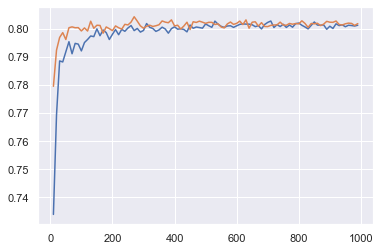

In [6]:
epoch = 99
avg = np.zeros(epoch)
unbiased_avg = np.zeros(epoch)
sample_size = np.zeros(epoch)
for i in range(epoch):
    sample_size[i] = i*10+10
    avg[i] = get_mean_of_sample_var(whole1, s_size=int(sample_size[i]), rep=1000, ddof=0)
    unbiased_avg[i] = get_mean_of_sample_var(whole1, s_size=int(sample_size[i]), rep=1000, ddof=1)

plt.plot(sample_size, avg, sample_size, unbiased_avg)

## 중심극한정리

모집단분포에 관계없이 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까와짐

$$ Y=X_1 + X_2 + \cdots $$

[참고자료](http://localhost:8888/notebooks/Desktop/Statistics/Untitled.ipynb?kernel_name=python3#)

책의 예

동전던지기(**이항분포**)에서 앞면이 나오는 수의 분포(**정규분포**)

```
n_size=10000
n_trial=50000

coin = np.array([0,1])

count_coin = np.zeros(n_trial)

for i in range(n_trial):
    count_coin[i]=sp.sum(
        np.random.choice(coin,size = n_size,replace=True)
    )
    
sns.distplot(count_coin)
```


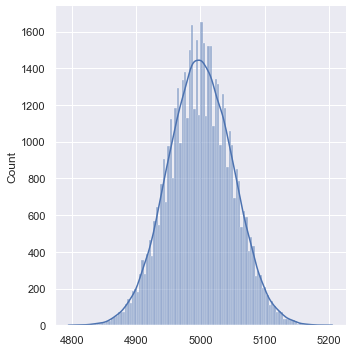

In [7]:
n_size = 10000
n_trial = 50000

coin = np.array([0,1])

count_coin = np.zeros(n_trial)

for i in range(n_trial):
    count_coin[i] = np.sum(
        np.random.choice(coin, size=n_size, replace=True)
    )

sns.displot(count_coin, kde=True)

In [8]:
coin = np.array([0,1])

In [9]:
np.sum(np.random.choice(coin, size=10, replace=True))

5